# Women's Health Data - Exploratory Data Analysis

This notebook analyzes women's health data from Oura ring devices, including activity, sleep, cardiovascular, stress, and other health metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import our custom analysis class
from oura_analysis import OuraAnalysis

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Initialize user metadata
user_metadata = {
    'name': 'Emma',
    'age': 26,
    'goals': 'performance'
}

# Initialize the Oura Analysis class with user metadata and load data
oura_analyzer = OuraAnalysis(user_metadata=user_metadata)
oura_analyzer.load_from_cache('data/')

print("\\nAvailable datasets:")
oura_analyzer.list_datasets()

# Run comprehensive analysis on all datasets
oura_analyzer.analyze_all_datasets()

print("\\nAnalysis complete! Summary of analyzed datasets:")
for dataset_name in oura_analyzer.summary_stats.keys():
    stats = oura_analyzer.get_summary_stats(dataset_name)
    print(f"  {dataset_name}: {stats['shape'][0]} rows, {len(stats['columns'])} columns")
    if stats['numeric_summary']:
        print(f"    Numeric columns: {len(stats['numeric_summary'])}")
    missing_total = sum(stats['missing_values'].values())
    if missing_total > 0:
        print(f"    Missing values: {missing_total}")

In [ ]:
# Example: Detailed analysis of daily activity data
oura_analyzer.get_dataset_info('daily_activity')

In [ ]:
# Display plots for daily activity
oura_analyzer.show_plot('daily_activity')

In [ ]:
# Display plots for sleep data
oura_analyzer.show_plot('daily_sleep')

In [ ]:
# Display plots for cardiovascular health
oura_analyzer.show_plot('cardiovascular_age')

# Display plots for heart rate data
oura_analyzer.show_plot('heart_rate')

In [ ]:
# Get summary statistics for a specific dataset
stats = oura_analyzer.get_summary_stats('daily_activity')
print("Daily Activity Statistics:")
print(f"Shape: {stats['shape']}")
print(f"Columns: {len(stats['columns'])}")
print(f"\\nNumeric Summary (first 3 columns):")
for i, (col, summary) in enumerate(list(stats['numeric_summary'].items())[:3]):
    print(f"\\n{col}:")
    for stat, value in summary.items():
        print(f"  {stat}: {value:.2f}" if isinstance(value, (int, float)) else f"  {stat}: {value}")

# Generate personalized health advice using Claude API
# Note: Requires ANTHROPIC_API_KEY environment variable to be set

print("User Profile:")
print(f"Name: {oura_analyzer.user_metadata['name']}")
print(f"Age: {oura_analyzer.user_metadata['age']}")
print(f"Goals: {oura_analyzer.user_metadata['goals']}")
print("\\n" + "="*60)

# Generate and display personalized advice
oura_analyzer.print_personalized_advice()

Cardiovascular Age Dataset Overview
Shape: (94, 2)


,day,vascular_age
0,2025-01-05,18
1,2025-01-06,19
2,2025-01-07,19
3,2025-01-08,20
4,2025-01-09,18


,vascular_age
count,94.000000
mean,18.968085
std,1.432737
min,15.000000
25%,18.000000
50%,19.000000
75%,20.000000
max,23.000000


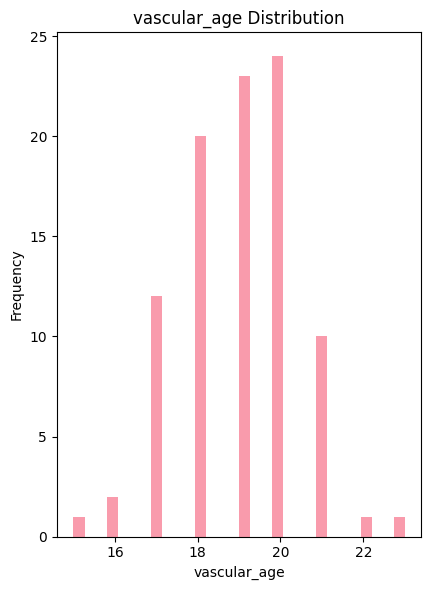



Heart Rate Dataset Overview
Shape: (333899, 3)


,timestamp,bpm,source
0,2023-01-21T19:20:38+00:00,55,live
1,2023-01-21T19:22:11+00:00,57,live
2,2023-01-21T19:41:39+00:00,68,awake
3,2023-01-21T19:41:52+00:00,71,awake
4,2023-01-21T19:41:57+00:00,79,awake


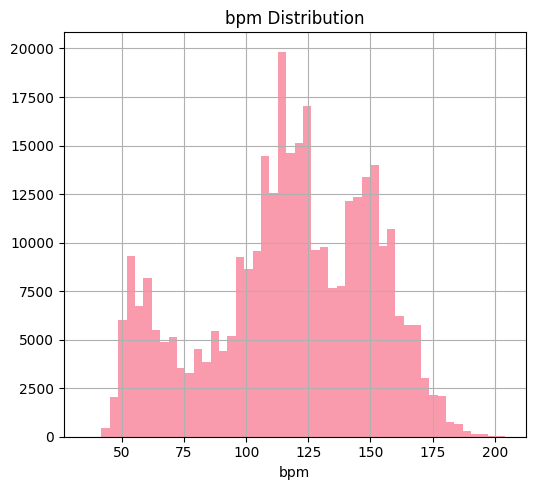



VO2 Max Dataset Overview
Shape: (3, 4)


,day,timestamp,vo2_max,id
0,2023-01-27,2023-01-27T06:46:17+00:00,11.0,44e30b3d-4a2f-4426-a585-43eb7df72493
1,2023-02-06,2023-02-06T07:30:41+00:00,19.0,1dc097d6-dfa2-4f94-8a4d-c9c5be0d4f43
2,2023-09-17,2023-09-17T12:12:47-07:00,31.0,58a563d2-a9e2-43f9-b4d4-362cfc93b43f


,vo2_max
count,3.000000
mean,20.333333
std,10.066446
min,11.000000
25%,15.000000
50%,19.000000
75%,25.000000
max,31.000000


In [5]:
if 'cardiovascular_age' in health_data:
    df = health_data['cardiovascular_age']
    print("Cardiovascular Age Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df.shape}")
    display(df.head())
    display(df.describe())
    
    # Cardiovascular age trends
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 6))
        for col in numeric_cols[:3]:
            plt.subplot(1, 3, numeric_cols.get_loc(col) + 1)
            df[col].plot(kind='hist', bins=30, alpha=0.7, title=f'{col} Distribution')
            plt.xlabel(col)
        plt.tight_layout()
        plt.show()

# Heart rate analysis
if 'heart_rate' in health_data:
    df_hr = health_data['heart_rate']
    print("\n\nHeart Rate Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df_hr.shape}")
    display(df_hr.head())
    
    # Heart rate patterns
    numeric_cols = df_hr.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(numeric_cols[:3]):
            plt.subplot(1, 3, i + 1)
            df_hr[col].hist(bins=50, alpha=0.7)
            plt.title(f'{col} Distribution')
            plt.xlabel(col)
        plt.tight_layout()
        plt.show()

# VO2 Max analysis
if 'vo2_max' in health_data:
    df_vo2 = health_data['vo2_max']
    print("\n\nVO2 Max Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df_vo2.shape}")
    display(df_vo2.head())
    display(df_vo2.describe())

## 4. Stress & Readiness Analysis

Daily Stress Dataset Overview
Shape: (371, 5)


,day,day_summary,recovery_high,stress_high,id
0,2023-09-18,normal,4500,0,36b960b8-636a-47af-ad56-f3ff9ca39cac
1,2023-09-19,normal,8100,900,2989b223-519a-419e-b47a-08ad46e4dda3
2,2023-09-20,stressful,0,9900,4d85b80c-3a2b-4d36-a445-de67e7c6d093
3,2023-09-21,normal,3600,2700,74c86371-4157-4978-9f15-87206c649b01
4,2023-09-22,normal,5400,2700,71a2cbc3-023a-43d9-bef2-7847bec2ef92


,recovery_high,stress_high
count,371.000000,371.000000
mean,1106.199461,4606.738544
std,2075.400151,6401.138656
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1800.000000
75%,1800.000000,7200.000000
max,16200.000000,45000.000000


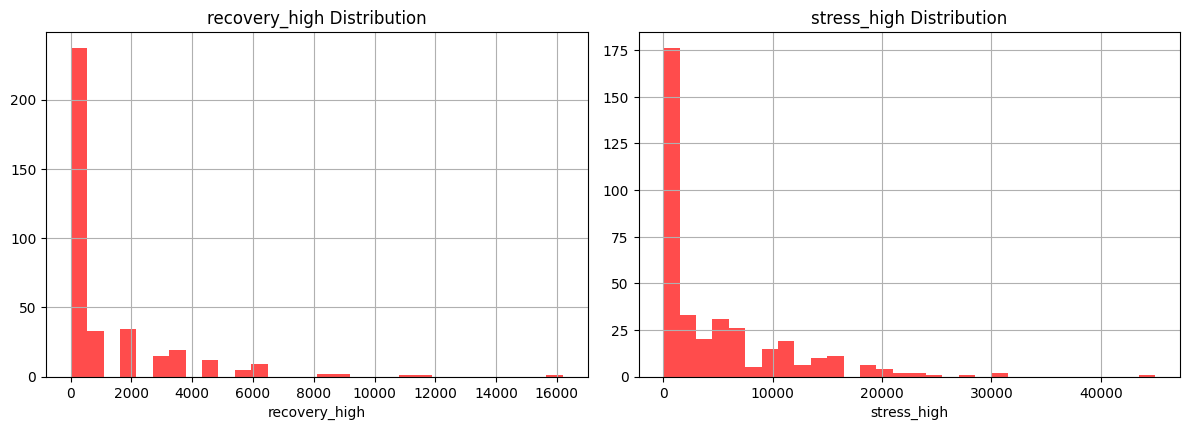



Daily Readiness Dataset Overview
Shape: (312, 7)


,day,timestamp,contributors,score,temperature_deviation,temperature_trend_deviation,id
0,2023-01-22,2023-01-22T00:00:00+00:00,"{'activity_balance': None, 'body_temperature':...",86,-0.07,NaN,bcce5739-e6d5-4825-a3c4-72f9a547d84f
1,2023-01-23,2023-01-23T00:00:00+00:00,"{'activity_balance': None, 'body_temperature':...",90,-0.05,0.00,860aa0d1-569d-48c3-99a6-51f2192030b7
2,2023-01-24,2023-01-24T00:00:00+00:00,"{'activity_balance': 78, 'body_temperature': 1...",86,-0.09,0.00,e6a19835-c06f-4080-9b5d-db0e0256a3b2
3,2023-01-25,2023-01-25T00:00:00+00:00,"{'activity_balance': 82, 'body_temperature': 1...",89,0.01,0.01,5aeea021-88cd-4a19-a894-1e38fab230c1
4,2023-01-26,2023-01-26T00:00:00+00:00,"{'activity_balance': 92, 'body_temperature': 1...",86,-0.08,0.01,9539b0b8-1963-467e-ad19-25425e3cf4d7


,score,temperature_deviation,temperature_trend_deviation
count,312.000000,311.000000,305.000000
mean,80.839744,-0.003280,0.061639
std,10.181312,0.246829,0.147101
min,32.000000,-0.520000,-0.330000
25%,77.000000,-0.135000,-0.020000
50%,83.000000,-0.020000,0.040000
75%,88.000000,0.080000,0.130000
max,95.000000,2.280000,1.010000


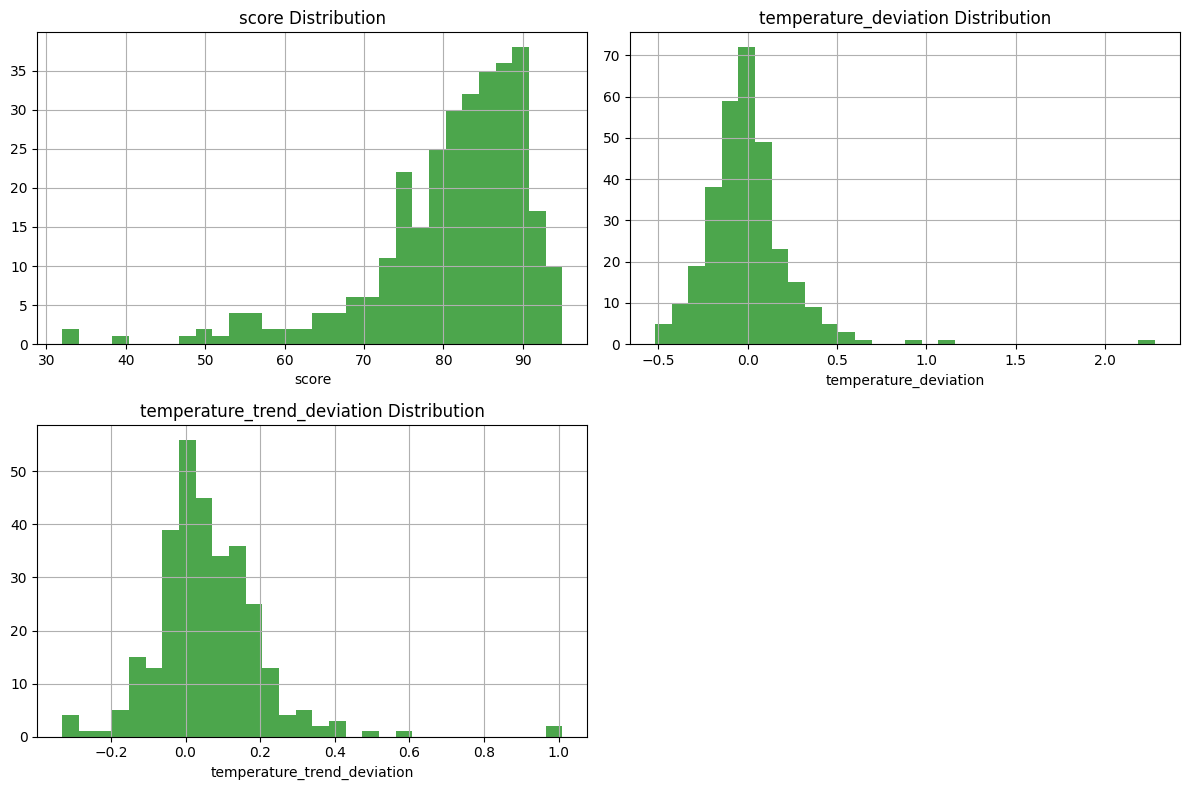



Daily Resilience Dataset Overview
Shape: (89, 4)


,day,contributors,level,id
0,2023-11-29,"{'sleep_recovery': 51.1, 'daytime_recovery': 4...",solid,45005fac-c33b-4032-a2c6-68bec4edbbe9
1,2023-11-30,"{'sleep_recovery': 52.6, 'daytime_recovery': 4...",solid,080f11f3-60eb-4f98-9d59-71525c7213fd
2,2023-12-03,"{'sleep_recovery': 54.6, 'daytime_recovery': 4...",solid,f7b757f0-3d07-4bd6-90ac-8689ef86d031
3,2023-12-05,"{'sleep_recovery': 50.2, 'daytime_recovery': 4...",solid,607c2b32-cabf-4f74-8541-0e63b4b23540
4,2023-12-06,"{'sleep_recovery': 51.2, 'daytime_recovery': 4...",solid,fc77a446-c9ca-4ffd-b543-486667713dc3


,day,contributors,level,id
count,89,89,89,89
unique,89,87,3,89
top,2023-11-29,"{'sleep_recovery': 54.9, 'daytime_recovery': 4...",strong,45005fac-c33b-4032-a2c6-68bec4edbbe9
freq,1,2,49,1


In [6]:
if 'daily_stress' in health_data:
    df = health_data['daily_stress']
    print("Daily Stress Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df.shape}")
    display(df.head())
    display(df.describe())
    
    # Stress level distributions
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(numeric_cols[:4]):
            plt.subplot(2, 2, i + 1)
            df[col].hist(bins=30, alpha=0.7, color='red')
            plt.title(f'{col} Distribution')
            plt.xlabel(col)
        plt.tight_layout()
        plt.show()

if 'daily_readiness' in health_data:
    df_readiness = health_data['daily_readiness']
    print("\n\nDaily Readiness Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df_readiness.shape}")
    display(df_readiness.head())
    display(df_readiness.describe())
    
    # Readiness score analysis
    numeric_cols = df_readiness.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(numeric_cols[:4]):
            plt.subplot(2, 2, i + 1)
            df_readiness[col].hist(bins=30, alpha=0.7, color='green')
            plt.title(f'{col} Distribution')
            plt.xlabel(col)
        plt.tight_layout()
        plt.show()

if 'daily_resilience' in health_data:
    df_resilience = health_data['daily_resilience']
    print("\n\nDaily Resilience Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df_resilience.shape}")
    display(df_resilience.head())
    display(df_resilience.describe())

## 5. Oxygen Saturation (SpO2) Analysis

Daily SpO2 Dataset Overview
Shape: (381, 4)


,day,spo2_percentage,breathing_disturbance_index,id
0,2023-01-22,{'average': 97.864},0.0,66dffe3e-ff7f-4d8c-9518-3c6585f2204e
1,2023-01-23,{'average': 97.948},0.0,469fe731-0bd1-44e9-8b06-231826f998af
2,2023-01-24,{'average': 98.022},0.0,28a18461-5980-4546-8113-75da307730a3
3,2023-01-25,{'average': 97.217},0.0,f668f084-0aee-44c6-a977-9a9118bc5a8f
4,2023-01-26,{'average': 97.844},0.0,5e4d748b-3be6-4cd9-8269-543bbf9004c2


,breathing_disturbance_index
count,377.000000
mean,1.023873
std,1.149451
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,7.000000


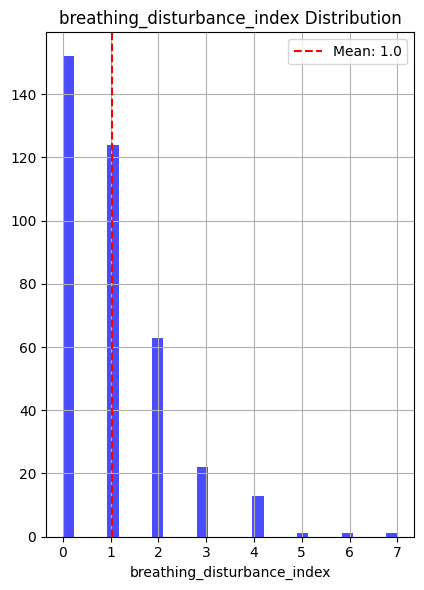


breathing_disturbance_index ranges:
  Normal (95-100%): 0 records
  Low (90-94%): 0 records
  Very Low (<90%): 377 records


In [7]:
if 'daily_spo2' in health_data:
    df = health_data['daily_spo2']
    print("Daily SpO2 Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df.shape}")
    display(df.head())
    display(df.describe())
    
    # SpO2 level analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 6))
        for i, col in enumerate(numeric_cols[:3]):
            plt.subplot(1, 3, i + 1)
            df[col].hist(bins=30, alpha=0.7, color='blue')
            plt.title(f'{col} Distribution')
            plt.xlabel(col)
            plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
            plt.legend()
        plt.tight_layout()
        plt.show()
        
        # SpO2 ranges analysis
        for col in numeric_cols[:2]:
            if col in df.columns:
                print(f"\n{col} ranges:")
                print(f"  Normal (95-100%): {((df[col] >= 95) & (df[col] <= 100)).sum()} records")
                print(f"  Low (90-94%): {((df[col] >= 90) & (df[col] < 95)).sum()} records") 
                print(f"  Very Low (<90%): {(df[col] < 90).sum()} records")
else:
    print("Daily SpO2 data not available")

## 6. Workout & Sessions Analysis

Workouts Dataset Overview
Shape: (1412, 10)


,day,start_datetime,end_datetime,activity,calories,distance,intensity,label,source,id
0,2023-01-21,2023-01-21T10:56:13+00:00,2023-01-21T12:11:13+00:00,running,537.300,NaN,moderate,NaN,manual,b8a6722b-3f5f-42ec-80ff-30f4fc498a1c
1,2023-01-21,2023-01-21T10:56:13+00:00,2023-01-21T12:16:13+00:00,running,573.120,NaN,moderate,NaN,manual,137f44ad-2794-4eb7-a3c1-7a8c0913c271
2,2023-01-21,2023-01-21T15:11:12+00:00,2023-01-21T17:16:12+00:00,walking,161.625,NaN,easy,NaN,manual,6514c763-dc0d-4cfe-88e0-0814cc8773b6
3,2023-01-22,2023-01-22T09:55:06+00:00,2023-01-22T11:01:21+00:00,cycling,NaN,179.856968,moderate,NaN,workout_heart_rate,247357c3-0ec3-492c-bb66-fe9228bce3f2
4,2023-01-22,2023-01-22T12:28:00+00:00,2023-01-22T13:22:00+00:00,walking,NaN,3461.927224,moderate,NaN,confirmed,495c47d3-8e26-4471-a1a3-6d9266d5b198


,calories,distance
count,479.000000,1254.000000
mean,112.432974,1745.406993
std,106.052252,2190.350405
min,14.388000,2.507674
25%,45.011000,423.589166
50%,81.532000,994.470120
75%,142.378000,2043.214077
max,818.216000,23823.277358


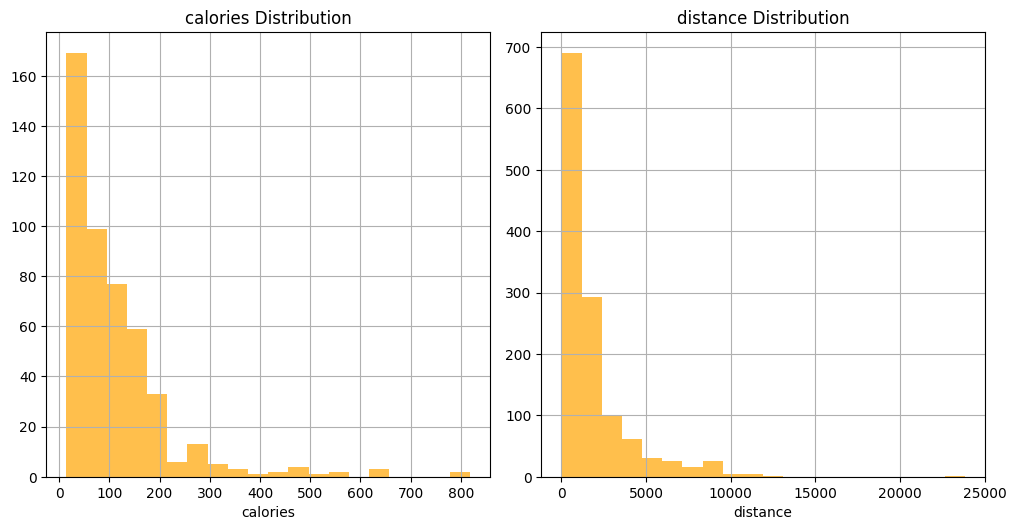



Sessions Dataset Overview
Shape: (0, 9)


,day,end_datetime,heart_rate,heart_rate_variability,mood,motion_count,start_datetime,type,id


,day,end_datetime,heart_rate,heart_rate_variability,mood,motion_count,start_datetime,type,id
count,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
if 'workouts' in health_data:
    df = health_data['workouts']
    print("Workouts Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df.shape}")
    display(df.head())
    display(df.describe())
    
    # Workout analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numeric_cols[:6]):
            plt.subplot(2, 3, i + 1)
            df[col].hist(bins=20, alpha=0.7, color='orange')
            plt.title(f'{col} Distribution')
            plt.xlabel(col)
        plt.tight_layout()
        plt.show()

if 'sessions' in health_data:
    df_sessions = health_data['sessions']
    print("\n\nSessions Dataset Overview")
    print("=" * 50)
    print(f"Shape: {df_sessions.shape}")
    display(df_sessions.head())
    display(df_sessions.describe())
    
    # Session patterns
    numeric_cols = df_sessions.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(numeric_cols[:4]):
            plt.subplot(2, 2, i + 1)
            df_sessions[col].hist(bins=20, alpha=0.7, color='purple')
            plt.title(f'{col} Distribution')
            plt.xlabel(col)
        plt.tight_layout()
        plt.show()

## 7. Cross-Dataset Correlations & Summary

Health Data Summary
Daily Activity: 322 records, 26 columns
Cardiovascular Age: 94 records, 2 columns
Daily Readiness: 312 records, 7 columns
Daily Resilience: 89 records, 4 columns
Daily Sleep: 312 records, 5 columns
Daily Spo2: 381 records, 4 columns
Daily Stress: 371 records, 5 columns
Heart Rate: 333899 records, 3 columns
Ring Config: 1 records, 7 columns
Sessions: 0 records, 9 columns
Sleep Detailed: 368 records, 28 columns
Tags: 18 records, 8 columns
Vo2 Max: 3 records, 4 columns
Workouts: 1412 records, 10 columns

Datasets with date columns for potential merging:
  daily_activity: ['day']
  cardiovascular_age: ['day']
  daily_readiness: ['day']
  daily_resilience: ['day']
  daily_sleep: ['day']
  daily_spo2: ['day']
  daily_stress: ['day', 'day_summary']
  sessions: ['day', 'end_datetime', 'start_datetime']
  sleep_detailed: ['day']
  tags: ['start_day', 'end_day']
  vo2_max: ['day']
  workouts: ['day', 'start_datetime', 'end_datetime']

Key Health Metrics Correlation Analysis


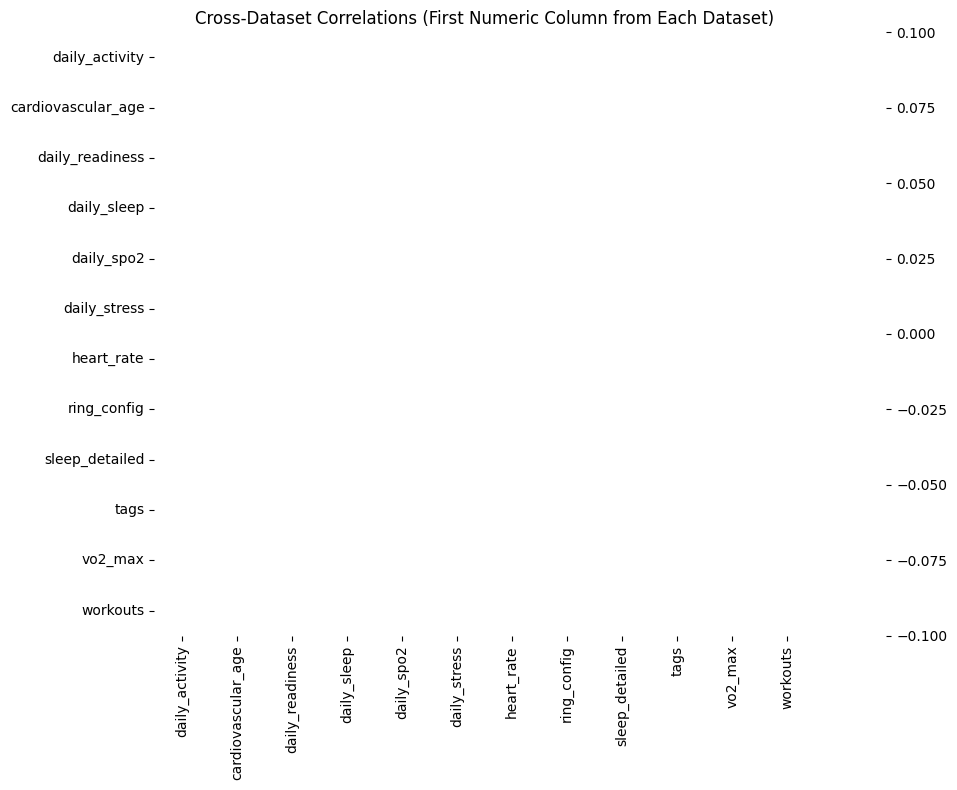

Correlation matrix created using first numeric column from each dataset


In [9]:
# Summary of all datasets
print("Health Data Summary")
print("=" * 50)
for name, df in health_data.items():
    print(f"{name.replace('_', ' ').title()}: {df.shape[0]} records, {df.shape[1]} columns")

# Look for common date columns to enable cross-dataset analysis
date_columns = []
for name, df in health_data.items():
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'day' in col.lower()]
    if date_cols:
        date_columns.append((name, date_cols))
        
print(f"\nDatasets with date columns for potential merging:")
for name, cols in date_columns:
    print(f"  {name}: {cols}")

# Create a correlation matrix if we have overlapping numeric data
print("\nKey Health Metrics Correlation Analysis")
print("=" * 50)

# Try to find common metrics across datasets for correlation analysis
if len(health_data) >= 2:
    correlation_data = {}
    
    # Extract key metrics from each dataset
    for name, df in health_data.items():
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            # Take first numeric column as representative metric
            correlation_data[name] = df[numeric_cols[0]].values[:min(100, len(df))]  # Limit to first 100 records
    
    if len(correlation_data) >= 2:
        # Create correlation matrix
        max_len = min([len(values) for values in correlation_data.values()])
        corr_df = pd.DataFrame({name: values[:max_len] for name, values in correlation_data.items()})
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Cross-Dataset Correlations (First Numeric Column from Each Dataset)')
        plt.tight_layout()
        plt.show()
        
        print("Correlation matrix created using first numeric column from each dataset")
    else:
        print("Insufficient numeric data for correlation analysis")
else:
    print("Need at least 2 datasets for correlation analysis")